### 학습목표
- 영화 리뷰데이터 수집 (블로그)할 수 있다.
- 수집한 데이터를 시각화 하기 위한 전처리를 할 수 있다.
- 워드클라우드를 생성할 수 있다.

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
import re  # 정규표현식 활용

In [4]:
# 영화 리뷰데이터가 들어있는 블로그 주소
# 페이지 정보 받아오기~
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&ssc=tab.nx.all&query=%EC%95%84%EB%B0%94%ED%83%803+%EB%A6%AC%EB%B7%B0&oquery=%EC%95%84%EB%B0%94%ED%83%802+%EB%A6%AC%EB%B7%B0&tqi=jUsNTwqos5ossi2ZKPZ-342894&ackey=74e97f8t'
res = req.get(url)
soup = bs(res.text, 'lxml')

### 프로세스
1. 영화리뷰가 작성된 블로그 제목 및 주소 수집
2. 리뷰가 작성된 블로그의 리뷰내용 수집 (첫번째 블로그에서 수집)
3. 여러개의 블로그 리뷰내용 수집
4. 수집한 텍스트데이터 전처리
5. 워드클라우드 생성하기~

1. 영화리뷰가 작성된 블로그 제목 및 주소 수집

In [12]:
# 블로그 주소 저장
href_list = []
a_tag = soup.select('div.review_info._ellipsis>a.review_link')
a_tag[1].get('href')
for i in range(len(a_tag)):
    temp = a_tag[i].get('href')
    href_list.append(temp)

In [13]:
href_list

['https://blog.naver.com/syunni1225/224115606045',
 'https://blog.naver.com/kaminari2002/224114898643',
 'https://blog.naver.com/seok9c/224115025215',
 'https://blog.naver.com/duswns202/224106859517',
 'https://blog.naver.com/dudghkrkwhgdms/224115758710',
 'https://blog.naver.com/blac_beat/224128473123',
 'https://blog.naver.com/realnogun/224113577463',
 'https://blog.naver.com/c106507/224111497322',
 'https://blog.naver.com/sta-tio/224114494844',
 'https://blog.naver.com/stmisn/224091045516']

In [14]:
# 블로그 제목 추출
soup.select('span.this_text')

[<span class="this_text">아바타: 불과 재(Avatar: Fire and Ash, 2025) 영화 정보... </span>,
 <span class="this_text">&lt;아바타3: 불과 재&gt; 4Dx3D후기 :: 그래도 극장에서 봐야하는 영화.... </span>,
 <span class="this_text">사실상 아바타 2.5가 아니었나, 영화 &lt;아바타: 불과 재&gt; 후기</span>,
 <span class="this_text">영화 아바타 불과 재 12세 관람가 러닝타임 등급 심사표 공개 수위</span>,
 <span class="this_text">아바타 3 불과 재 쿠키 영상 정보 영화 리뷰</span>,
 <span class="this_text">영화 아바타3: 불과 재(2025) 정보, 줄거리, 결말, 후기</span>,
 <span class="this_text">영화 아바타 3편 불과 재 줄거리 결말 쿠키없음</span>,
 <span class="this_text">아바타 불과재 출격! 12월 셋째주 개봉 예정 영화</span>,
 <span class="this_text">[영화 리뷰] 아바타: 불과 재 (2025년) 감상평과 후기, 영화 정보... </span>,
 <span class="this_text">영화 '아바타: 불과 재' 시사회 초청 이벤트, KT 멤버십 X 롯데시네마</span>]

- 첫번째 블로그 내용 수집하기!

In [16]:
# 첫번째 페이지의 정보 받아오기
res1 = req.get(href_list[0])
soup1 = bs(res1.text, 'lxml')

In [18]:
soup1.select('div.se-main-container')
soup1.select('#post-view224115606045 > div > div.se-main-container')

[]

### iframe
- 하나의 페이지에 많은 양의 데이터가 저장되어있으면 페이지가 무거워짐 -> 속도가 느려짐
- 데이터는 다른 저장사이트에 저장해두고 현재 페이지에서는 보여주기만하는 형태로 출력
- 데이터 수집을 위해서 실제 데이터가 저장된 공간으로 접근
- ex) 블로그, 카페, 지식인, 지도

- 실제 데이터의 주소
  - 메인 주소값 + src -> 실제 블로그 주소 생성
  - https://blog.naver.com + src

In [24]:
# src 추출하기
src = soup1.select_one('iframe#mainFrame').get('src')
# 실제 주소 완성하기
# 메인주소 + src
blog_url = 'https://blog.naver.com' + src
blog_url

'https://blog.naver.com/PostView.naver?blogId=syunni1225&logNo=224115606045&redirect=Dlog&widgetTypeCall=true&noTrackingCode=true&directAccess=false'

- 1개 블로그의 리뷰 수집

In [26]:
# blog_url 의 페이지 정보 요청, 응답
res2 = req.get(blog_url)
soup2 = bs(res2.text,'lxml')

In [38]:
# blog_url 페이지에서 리뷰내용 수집
content = soup2.select('div.se-main-container')[0].text
content

"\n\n\n\n\n영화 <아바타: 불과 재> 정보, 줄거리, 리뷰\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\u200b\u200b\u200b\n\n\n\n\n \n\n\n\n영화 정보\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n기본 정보\n\n\n\n\n\n\n\n\n원제 : Avatar: Fire and Ash수입/배급 : 월트디즈니 컴퍼니 코리아감독 : 제임스 카메론출연 : 샘 워싱턴, 조이 살다나, 시고니 위버, 스티븐 랭, 우나 채플린, 케이트 윈슬렛 외제작 국가 : 미국장르 : 액션, 어드벤처(모험), 판타지, SF, 스릴러관람 등급 : 12세 이상 관람가상영 시간 : 195분극장 개봉 : 2025년 12월 17일\u200b\n\n\n\n\n \n\n\n\n줄거리\n\n\n\n\n\n\n\n\n큰아들을 잃은 제이크 설리와 네이티리 가족은 저마다 애도를 하고 있다. 그러던 중 그들 가족에게 다시 위기가 찾아오는데...\u200b\u200b\u200b\n\n\n\n\n \n\n\n\n리뷰로 보는 관람 포인트\n\n\n\n\n\n\n\n\n여전히 말 안 듣는 아이들\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n3편을 보기 위해 굳이 2편을 복습하지 않아도 될 것 같아 일단 보기 시작한 영화 오프닝에서는 전편에서 사망한 네테이얌이 등장해 로아크와 자유롭게 비행을 하는 모습을 보여줬다. 나비족만이 할 수 있는 의식 같은 걸로 로아크는 죽은 형과 대화하며 즐거운 시간을 보낼 수 있던 것이었다.로아크가 자신만의 방식으로 형을 그리워하고 있을 때 엄마인 네이티리는 상실감에 아무것도 하지 못하고 슬퍼하기만 했다. 그리고 설리는 인간이 다시금 공격을 해올 걸 예상해 바다에 가라앉은 인간들의 전함에서 총을 비롯한 각종 무기를 모으기 시작했다. 설리네 가족이 의지하고 있는 멧카이나의 부족장은 강하게 반발했지만 설리는 뜻을 굽히지 않았다.\u200b\n\n\n\n\n \n\

- 정규표현식을 활용한 데이터 전처리~
  - re
  - 정규표현식: 문자열 내에서 특정규칙(패턴)을 찾아 변하는 도구

| 구성요소                  | 의미                       |
| --------------------- | ------------------------ |
| `r"..."`              | Raw string — 이스케이프 문자 무시 |
| `[^ ... ]`            | 괄호 안 문자 **제외한** 문자들      |
| `0-9`                 | 숫자                       |
| `가-힣`                 | 모든 한글                    |
| `?.!,¿`               | 허용할 문장 부호                |
| `+`                   | 하나 이상 연속된 구간             |
| `re.sub(..., " ", w)` | 매칭된 부분을 공백으로 치환          |

In [35]:
# 문자열 전처리 함수 -> 숫자, 문자, (?.!,¿) 제외하고 공백으로 대체
def preprocess_sentence_kr(w):
  w = w.strip()
  w = re.sub(r"[^0-9가-힣?.!,¿]+", " ", w) 
  w = w.strip() 
  return w

In [39]:
# 함수 적용
preprocess_sentence_kr(content)

'영화 아바타 불과 재 정보, 줄거리, 리뷰 영화 정보 기본 정보 원제 수입 배급 월트디즈니 컴퍼니 코리아감독 제임스 카메론출연 샘 워싱턴, 조이 살다나, 시고니 위버, 스티븐 랭, 우나 채플린, 케이트 윈슬렛 외제작 국가 미국장르 액션, 어드벤처 모험 , 판타지, , 스릴러관람 등급 12세 이상 관람가상영 시간 195분극장 개봉 2025년 12월 17일 줄거리 큰아들을 잃은 제이크 설리와 네이티리 가족은 저마다 애도를 하고 있다. 그러던 중 그들 가족에게 다시 위기가 찾아오는데... 리뷰로 보는 관람 포인트 여전히 말 안 듣는 아이들 3편을 보기 위해 굳이 2편을 복습하지 않아도 될 것 같아 일단 보기 시작한 영화 오프닝에서는 전편에서 사망한 네테이얌이 등장해 로아크와 자유롭게 비행을 하는 모습을 보여줬다. 나비족만이 할 수 있는 의식 같은 걸로 로아크는 죽은 형과 대화하며 즐거운 시간을 보낼 수 있던 것이었다.로아크가 자신만의 방식으로 형을 그리워하고 있을 때 엄마인 네이티리는 상실감에 아무것도 하지 못하고 슬퍼하기만 했다. 그리고 설리는 인간이 다시금 공격을 해올 걸 예상해 바다에 가라앉은 인간들의 전함에서 총을 비롯한 각종 무기를 모으기 시작했다. 설리네 가족이 의지하고 있는 멧카이나의 부족장은 강하게 반발했지만 설리는 뜻을 굽히지 않았다. 그러던 중에 제이크는 인간인 스파이더를 바람 상인의 편에 보내려고 했다. 스파이더가 쿼리치의 아들이었기에 데리고 있으면 그가 언제든 다시 공격해올 수 있었기 때문이었다. 스파이더는 강하게 반발했고, 설리의 아이들까지도 가족이라며 보내면 안 된다고 했지만 부모의 뜻을 꺾을 수는 없었다. 그나마 함께 가서 데려다주고 오자는 의견으로 분위기가 조금 누그러졌다. 바람 상인과 함께 떠나게 된 설리의 가족은 시작부터 불안불안하기만 했다. 이 사건 이전에 스파이더가 자던 중에 마스크에 문제가 생겨 죽을 뻔했었고, 설리가 로아크에게 무전기를 차야 한다고 했던 적이 있었다. 하지만 이 두 아이들은 당연히 말을 안 들었다. 전편에서 

- 수집한 10개 블로그리뷰를 텍스트 파일로 저장하기~

In [40]:
len(href_list)

10

In [41]:
from tqdm import tqdm

In [48]:
# open 함수를 사용하여 파일 열어서 초기회
f = open('./data/movie_review.txt', 'w', encoding = 'utf-8')
# 반복문을 활용하여 블로그 주소 10개 반복 (tqdm)
for i in tqdm(range(len(href_list))):
    res1 = req.get(href_list[i])
    soup1 = bs(res1.text, 'lxml')

    # iframe src 속성값을 추출하여 실제 블로그 주소 생성
    src = soup1.select_one('iframe#mainFrame').get('src')
    blog_url = 'https://blog.naver.com' + src

    # 실제 내용이 들어있는 블로그 페이지 정보 받아오기
    res2 = req.get(blog_url)
    soup2 = bs(res2.text,'lxml')

    # 본문내용 수집, 전처리
    content = soup2.select('div.se-main-container')[0].text
    final_content = preprocess_sentence_kr(content)
    f.write(final_content)
f.close() # 파일 닫기

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.05it/s]


- 워드클라우드 생성

In [1]:
f = open('./data/movie_review.txt','r', encoding='utf-8')
review = f.readline()
f.close()

In [2]:
review

'영화 아바타 불과 재 정보, 줄거리, 리뷰 영화 정보 기본 정보 원제 수입 배급 월트디즈니 컴퍼니 코리아감독 제임스 카메론출연 샘 워싱턴, 조이 살다나, 시고니 위버, 스티븐 랭, 우나 채플린, 케이트 윈슬렛 외제작 국가 미국장르 액션, 어드벤처 모험 , 판타지, , 스릴러관람 등급 12세 이상 관람가상영 시간 195분극장 개봉 2025년 12월 17일 줄거리 큰아들을 잃은 제이크 설리와 네이티리 가족은 저마다 애도를 하고 있다. 그러던 중 그들 가족에게 다시 위기가 찾아오는데... 리뷰로 보는 관람 포인트 여전히 말 안 듣는 아이들 3편을 보기 위해 굳이 2편을 복습하지 않아도 될 것 같아 일단 보기 시작한 영화 오프닝에서는 전편에서 사망한 네테이얌이 등장해 로아크와 자유롭게 비행을 하는 모습을 보여줬다. 나비족만이 할 수 있는 의식 같은 걸로 로아크는 죽은 형과 대화하며 즐거운 시간을 보낼 수 있던 것이었다.로아크가 자신만의 방식으로 형을 그리워하고 있을 때 엄마인 네이티리는 상실감에 아무것도 하지 못하고 슬퍼하기만 했다. 그리고 설리는 인간이 다시금 공격을 해올 걸 예상해 바다에 가라앉은 인간들의 전함에서 총을 비롯한 각종 무기를 모으기 시작했다. 설리네 가족이 의지하고 있는 멧카이나의 부족장은 강하게 반발했지만 설리는 뜻을 굽히지 않았다. 그러던 중에 제이크는 인간인 스파이더를 바람 상인의 편에 보내려고 했다. 스파이더가 쿼리치의 아들이었기에 데리고 있으면 그가 언제든 다시 공격해올 수 있었기 때문이었다. 스파이더는 강하게 반발했고, 설리의 아이들까지도 가족이라며 보내면 안 된다고 했지만 부모의 뜻을 꺾을 수는 없었다. 그나마 함께 가서 데려다주고 오자는 의견으로 분위기가 조금 누그러졌다. 바람 상인과 함께 떠나게 된 설리의 가족은 시작부터 불안불안하기만 했다. 이 사건 이전에 스파이더가 자던 중에 마스크에 문제가 생겨 죽을 뻔했었고, 설리가 로아크에게 무전기를 차야 한다고 했던 적이 있었다. 하지만 이 두 아이들은 당연히 말을 안 들었다. 전편에서 

- 형태소 분석기를 활용하여 문서 -> 토큰화 -> 단어단위로 변경
  - 키위 형태소 분석기 사용

In [51]:
# 형태소 분석기 설치
!pip install kiwipiepy

In [52]:
# 워드클라우드 생성 도구 설치
!pip install wordcloud

In [54]:
# 라이브러리 불러오기
from kiwipiepy import Kiwi # 키위 형태소 분석기
from wordcloud import WordCloud # 워드클라우드 생성 도구
from collections import Counter # 단어가 나온 횟수를 세주는 도구
import matplotlib.pyplot as plt # 시각화 도구 

In [55]:
# 도구 객체생성
kiwi = Kiwi()
# 토큰화
token = kiwi.tokenize(review)

In [56]:
token

[Token(form='영화', tag='NNG', start=0, len=2),
 Token(form='아바타', tag='NNP', start=3, len=3),
 Token(form='불과', tag='MAG', start=7, len=2),
 Token(form='재', tag='XPN', start=10, len=1),
 Token(form='정보', tag='NNG', start=12, len=2),
 Token(form=',', tag='SP', start=14, len=1),
 Token(form='줄거리', tag='NNG', start=16, len=3),
 Token(form=',', tag='SP', start=19, len=1),
 Token(form='리뷰', tag='NNG', start=21, len=2),
 Token(form='영화', tag='NNG', start=24, len=2),
 Token(form='정보', tag='NNG', start=27, len=2),
 Token(form='기본', tag='NNG', start=30, len=2),
 Token(form='정보', tag='NNG', start=33, len=2),
 Token(form='원', tag='NNG', start=36, len=1),
 Token(form='제', tag='XSN', start=37, len=1),
 Token(form='수입', tag='NNG', start=39, len=2),
 Token(form='배급', tag='NNG', start=42, len=2),
 Token(form='월트', tag='NNP', start=45, len=2),
 Token(form='디즈니', tag='NNP', start=47, len=3),
 Token(form='컴퍼니', tag='NNG', start=51, len=3),
 Token(form='코리아', tag='NNP', start=55, len=3),
 Token(form='감독', 

In [57]:
# 일반명사만 추출 (NNG)
# token 의 리스트를 돌면서, tag 가 NNG 인 form 을 nng_list 에 담아주세요~
nng_list = []
for t in token:
    if t.tag == 'NNG':
        nng_list.append(t.form)

In [58]:
nng_list

['영화',
 '정보',
 '줄거리',
 '리뷰',
 '영화',
 '정보',
 '기본',
 '정보',
 '원',
 '수입',
 '배급',
 '컴퍼니',
 '감독',
 '출연',
 '제작',
 '국가',
 '장르',
 '액션',
 '모험',
 '판타지',
 '스릴러',
 '관람',
 '등급',
 '이상',
 '관람',
 '가',
 '상영',
 '시간',
 '극장',
 '개봉',
 '줄거리',
 '아들',
 '가족',
 '애도',
 '가족',
 '위기',
 '리뷰',
 '관람',
 '포인트',
 '말',
 '아이',
 '복습',
 '시작',
 '영화',
 '오프닝',
 '전편',
 '사망',
 '등장',
 '자유',
 '비행',
 '모습',
 '나비',
 '족',
 '의식',
 '형',
 '대화',
 '시간',
 '자신',
 '방식',
 '형',
 '때',
 '엄마',
 '상실감',
 '아무것',
 '인간',
 '공격',
 '예상',
 '바다',
 '인간',
 '전함',
 '총',
 '각종',
 '무기',
 '시작',
 '가족',
 '의지',
 '부족장',
 '반발',
 '뜻',
 '인간',
 '바람',
 '상인',
 '편',
 '아들',
 '공격',
 '스파이더',
 '반발',
 '아이',
 '가족',
 '부모',
 '뜻',
 '의견',
 '분위기',
 '바람',
 '상인',
 '가족',
 '시작',
 '불안',
 '불안',
 '사건',
 '이전',
 '마스크',
 '문제',
 '무전기',
 '아이',
 '말',
 '전편',
 '말',
 '아이',
 '짜증',
 '기억',
 '이번',
 '어처구니',
 '정신',
 '이후',
 '영화',
 '후반',
 '키리',
 '형제',
 '자신',
 '뜻',
 '행동',
 '막내',
 '멧카이',
 '부족장',
 '딸',
 '후반',
 '엄마',
 '반발',
 '모습',
 '행동',
 '이유',
 '말',
 '애',
 '머리',
 '가족',
 '가족',
 '바람',
 '상인',
 '족',
 '공격',
 '시작',
 '전쟁'

In [ ]:
# 간편하게 리스트에 데이터를 누적하는 방법
# 리스트명 = [실행문 반복문 조건]
nng_list = [t.form for t in token if t.tag == 'NNG']

In [59]:
# list 에 담긴 데이터의 개수를 세서 많이나오는 단어로 워드클라우드 생성
counter = Counter(nng_list)
counter

Counter({'영화': 120,
         '족': 61,
         '부족': 55,
         '불': 51,
         '재': 49,
         '가족': 44,
         '이번': 43,
         '시리즈': 43,
         '작품': 43,
         '나비': 37,
         '개봉': 33,
         '이야기': 32,
         '액션': 31,
         '인간': 31,
         '관람': 30,
         '물': 28,
         '장면': 26,
         '바랑': 26,
         '등장': 25,
         '타임': 25,
         '러닝': 24,
         '시간': 23,
         '점': 23,
         '시작': 21,
         '전투': 21,
         '극장': 20,
         '길': 20,
         '모습': 19,
         '이후': 19,
         '키리': 19,
         '느낌': 19,
         '감독': 18,
         '생각': 18,
         '관객': 17,
         '정도': 17,
         '아이': 16,
         '자신': 16,
         '행성': 15,
         '줄거리': 14,
         '모험': 14,
         '말': 14,
         '때': 14,
         '내용': 14,
         '결말': 14,
         '반복': 14,
         '전작': 14,
         '리뷰': 13,
         '전쟁': 13,
         '캐릭터': 13,
         '재의': 13,
         '상영': 12,
         '효과': 12,
         '세계': 

In [61]:
# 상위 100개 단어만 추출
top_100 = counter.most_common(100)

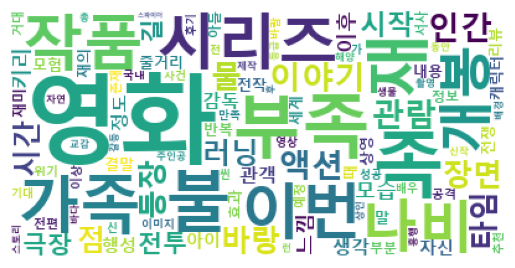

In [62]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgunbd.ttf',
    background_color='white'    
).generate_from_frequencies(dict(top_100))
plt.imshow(wc)
plt.axis('off')
plt.show()